In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb #XGBoost
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

from sklearn import tree #의사결정나무
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

from sklearn.model_selection import GridSearchCV #GridSearch를 통해 최적의 파라미터를 찾아냄
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #가우시안 나이브 베이즈

from sklearn.preprocessing import MinMaxScaler #스케일링 라이브러리
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC

from xgboost import plot_importance #XGBoost를 사용시 Feature Importance를 불러오기 위함
from xgboost import XGBClassifier #XGBoost 분류기

# 데이터를 수집합니다.
train = pd.read_csv("C:/Users/tjoeun709-17/Desktop/open/train2.csv")
# 수집된 데이터 샘플을 확인합니다.
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,3,1,1,0,0,0,2.0,0,1.0
1,1,0,0,1,1,0,0,4,0,1,2,1,1,0,0,1,3.0,0,1.0
2,2,1,1,1,0,1,4,1,1,1,6,1,1,0,1,0,2.0,1,2.0
3,3,0,0,1,0,0,0,4,1,1,4,1,1,0,1,0,2.0,2,0.0
4,4,0,1,1,0,0,2,1,1,1,4,1,1,0,0,0,2.0,1,2.0


In [12]:
# 현재 데이터에서 신용등급의 개수를 확인
train.credit.value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [13]:
train.car.value_counts()

0    16410
1    10047
Name: car, dtype: int64

In [14]:
train.reality.value_counts()

1    17830
0     8627
Name: reality, dtype: int64

Text(0.5,1,'reality and car in 2d plane')

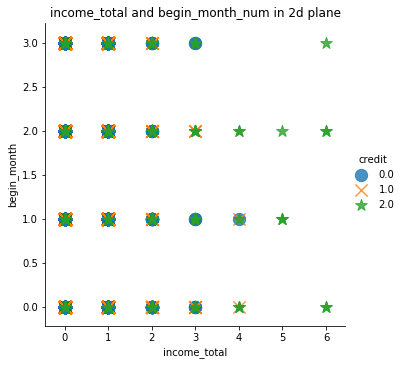

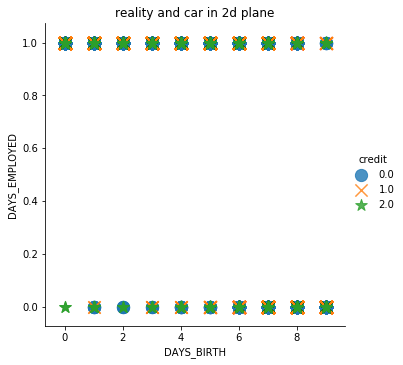

In [5]:
sns.lmplot('income_total', 'begin_month', data=train, fit_reg=False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점의 크기
           markers=["o", "x", "*"],
          hue="credit") # 예측값
# 타이틀
plt.title('income_total and begin_month_num in 2d plane')


sns.lmplot('DAYS_BIRTH', 'DAYS_EMPLOYED', data=train, fit_reg=False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점의 크기
           markers=["o", "x", "*"],
          hue="credit") # 예측값
# 타이틀
plt.title('reality and car in 2d plane')

#이산형 변수 확인.

In [121]:
#사이킷런의 train_test_split을 사용, 데이터 나누기
from sklearn.model_selection import train_test_split
# 다듬어진 데이터에서 10%를 테스트 데이터로 분류
train_set, test_set = train_test_split(train, test_size=0.1)

In [16]:
train_set.shape[0]

23811

In [17]:
test_set.shape[0]

2646

In [122]:
#스케일 적용, 0 ~ 1 사이 값으로 변환하여 정확도를 향상시킬 것으로 기대
scaler = MinMaxScaler()

# 테스트 데이터에서 분류를 위해 사용도리 속성을 지정
x_train = train_set[['gender', 'car', 'reality', 'edu_type', 'family_type', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                  'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'income_type',
                  'begin_month', 'house_type']] #여기에 분별력이 있는 컬럼들을 써줘야 한다.

y_train = train_set[['credit']]

x_train_scale = scaler.fit_transform(x_train)

# 테스트 데이터에서 분류를 위해 사용도리 속성을 지정
x_test = test_set[['gender', 'car', 'reality', 'edu_type', 'family_type', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                  'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'income_type',
                  'begin_month', 'house_type']]

# 정답을 지정
y_test = test_set[['credit']]

x_test_scale = scaler.fit_transform(x_test)

In [38]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 학습 데이터 절반까지 지정
max_k_range = train_set.shape[0] // 2

#정확도 값을 저장하기 위한 리스트 초기화
k_list = []

#학습 범위는 2000개
for i in range(2000, max_k_range, 2000):
    k_list.append(i)
    
cross_validation_scores = []


# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_scale, y_train.values.ravel(), cv=10,
                                            scoring='accuracy')
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

[0.6409642739135142,
 0.6409642739135142,
 0.6409642739135142,
 0.6409642739135142,
 0.6409642739135142]

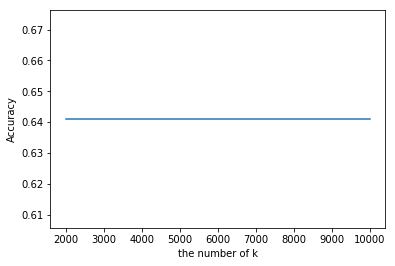

In [39]:
# k에 따른 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [40]:
# 가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 2000


In [41]:

# 학습에 사용될 속성을 지정
# x_train = train_set[['gender', 'car', 'reality', 'edu_type', 'family_type', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
#                   'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'income_type',
#                   'begin_month', 'house_type']]

#x_train_scale = scaler.fit_transform(x_train)

# 예측할 값으로 지정
# y_train = train_set[['credit']]

# knn 모델 학습
knn.fit(x_train_scale, y_train.values.ravel())

# 테스트 시작
pred = knn.predict(x_test_scale)

# 모델 예측 정확도(accuracy) 출력
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.6447467876039304


In [42]:
#KNN 학습방법을 이용하여 test-set의 값을 예측하여 정답과 함께 표시
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,2.0,1.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0
4,2.0,1.0
...,...,...
2641,2.0,2.0
2642,2.0,2.0
2643,2.0,2.0
2644,2.0,2.0


#서포트 벡터 머신(SVM)

In [44]:
def svc_param_selection(x, y, nfolds):
    svm_parameters = [
                        {'kernel' : ['rbf'],
                         'gamma': [0.01, 0.1, 1],
                         'C': [10, 100, 1000]}
                     ]
    # 사이킷런에서 제공하는 GridSearchCV를 사용해 최적의 파라미터를 구함
    clf = GridSearchCV(SVC(), svm_parameters, cv=5)
    clf.fit(x_train, y_train.values.ravel())
    print(clf.best_params_)

    return clf

# x_train = train_set[['gender', 'car', 'reality', 'edu_type', 'family_type', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
#                   'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'income_type',
#                   'begin_month', 'house_type']]

# y_train = train_set[['credit']]

# 최적의 파라미터로 학습된 모델을 clf로 저장
clf = svc_param_selection(x_train, y_train.values.ravel(), 5)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [45]:
# x_test = test_set[['gender', 'car', 'reality', 'edu_type', 'family_type', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
#                   'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'income_type',
#                   'begin_month', 'house_type']]
# y_test = test_set[['credit']]

# 최적의 파라미터로 학습된 모델로 테스트를 진행
y_true, y_pred = y_test, clf.predict(x_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy : " + str(accuracy_score(y_true, y_pred)) )

              precision    recall  f1-score   support

         0.0       0.33      0.04      0.07       311
         1.0       0.52      0.15      0.23       629
         2.0       0.67      0.95      0.78      1706

    accuracy                           0.65      2646
   macro avg       0.50      0.38      0.36      2646
weighted avg       0.59      0.65      0.57      2646


accuracy : 0.6519274376417233


In [46]:
#SVM 학습방법을 이용하여 test-set의 값을 예측하여 정답과 함께 표시
comparison2 = pd.DataFrame({'prediction':y_pred,
                          'ground_truth':y_true.values.ravel()})
comparison2

,prediction,ground_truth
0,2.0,1.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0
4,2.0,1.0
...,...,...
2641,2.0,2.0
2642,2.0,2.0
2643,2.0,2.0
2644,2.0,2.0


In [22]:
train_DT = pd.DataFrame(train_set)
train_DT = train_set[['gender', 'car', 'reality', 'child_num', 'income_total', 
                      'income_type', 'edu_type', 'family_type', 'house_type',
                      'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone',
                      'phone', 'email', 'family_size', 'begin_month', 'credit']]

test_DT = pd.DataFrame(test_set)
test_DT = test_set[['gender', 'car', 'reality', 'child_num', 'income_total', 
                      'income_type', 'edu_type', 'family_type', 'house_type',
                      'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone',
                      'phone', 'email', 'family_size', 'begin_month', 'credit']]

In [23]:
train_DT.credit.value_counts()

2.0    15283
1.0     5627
0.0     2901
Name: credit, dtype: int64

In [24]:
test_DT.credit.value_counts()

2.0    1685
1.0     640
0.0     321
Name: credit, dtype: int64

In [25]:
train_DT.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
13252,0,0,0,1,0,2,4,3,2,6,1,1,0,1,0,2.0,0,2.0
3300,0,0,0,0,0,4,4,2,1,5,1,1,0,0,0,1.0,1,2.0
15961,0,0,1,1,0,0,4,1,1,4,1,1,0,0,0,3.0,2,0.0
14251,1,1,1,0,0,1,4,1,1,8,0,1,0,1,0,2.0,1,2.0
21087,1,0,1,0,1,4,1,1,1,3,1,1,1,0,0,2.0,2,2.0


In [41]:
x_DTtrain = train_DT[['gender', 'car', 'reality', 'child_num', 'income_total', 
                      'income_type', 'edu_type', 'family_type', 'house_type',
                      'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone',
                      'phone', 'email', 'family_size', 'begin_month']]
y_DTtrain = train_DT[['credit']]

x_DTtest = test_DT[['gender', 'car', 'reality', 'child_num', 'income_total', 
                      'income_type', 'edu_type', 'family_type', 'house_type',
                      'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone',
                      'phone', 'email', 'family_size', 'begin_month']]
y_DTtest = test_DT[['credit']]

#의사결정나무

In [42]:
#전처리 라이브러리에서 라벨값 입력해주는 함수를 불러옴.(라벨값을 부여해야 의사결정나무에서 계수 설정 가능.)
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_DTtrain)

#의사결정나무(랜덤 시드값 5) 생성
clf = tree.DecisionTreeClassifier(random_state=5).fit(x_DTtrain, y_encoded)

In [28]:
#graphviz가 있으려나 모르겠네.
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("credit")
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names = ['gender', 'car', 'reality', 'child_num', 'income_total', 
                                                  'income_type', 'edu_type', 'family_type', 'house_type',
                                                  'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone',
                                                  'phone', 'email', 'family_size', 'begin_month', 'credit'],
                               class_names=['0', '1', '2'],
                               filled=True, rounded=True,
                               special_characters=True)

graph = graphviz.Source(dot_data)
graph

ModuleNotFoundError: No module named 'graphviz'

In [43]:
pred = clf.predict(x_DTtest)

In [44]:
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), le.classes_[pred])))

accuracy : 0.5884353741496599


In [45]:
#의사결정나무를 학습방법을 이용하여 test-set의 값을 예측하여 정답과 함께 표시
comparison3 = pd.DataFrame({'prediction':le.classes_[pred],
                           'ground_truth':y_DTtest.values.ravel()})
comparison3

,prediction,ground_truth
0,2.0,1.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0
4,1.0,1.0
...,...,...
2641,2.0,1.0
2642,0.0,0.0
2643,0.0,2.0
2644,2.0,2.0


#XGBoost

In [138]:
x = train.drop(['credit'], axis=1)
y = train['credit']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state = 10086)
print(X_train.shape, X_test.shape)

(23811, 18) (2646, 18)


#XGBoost의 정확도 계산

In [139]:
#XGBoost의 분류기 사용, 횟수는 500회, 학습률은 0.2, 차수는 4
xgb_classifier = XGBClassifier(n_estimator=500, learning_rate=0.2, max_depth=4)
xgb_classifier.fit(X_train, Y_train)
xgb_pred = xgb_classifier.predict(X_test)

[16:42:29] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:42:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [140]:
#예측한 값을 정답과 비교
accuracy_score(Y_test, xgb_pred)

0.6462585034013606

In [141]:
classification_report(Y_test, xgb_pred, target_names=['0', '1', '2'])

'              precision    recall  f1-score   support\n\n           0       1.00      0.00      0.01       306\n           1       0.50      0.05      0.09       636\n           2       0.65      0.99      0.78      1704\n\n    accuracy                           0.65      2646\n   macro avg       0.72      0.35      0.29      2646\nweighted avg       0.65      0.65      0.53      2646\n'

[17:14:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


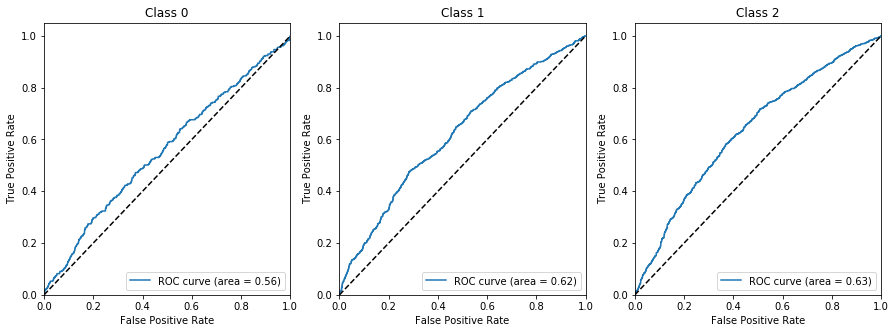

roc_auc_score:  0.6031106478810117


In [161]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

n_classes = 3
#샘플 데이터 만들기
a = train.drop(['credit'], axis=1)
b = train['credit']
# a, b = make_classification(n_samples=50, n_features=17,
#                           n_informative=3, n_redundant=2,
#                           n_clusters_per_class=2,
#                           n_classes=n_classes,
#                           weights=[0.3, 0.2, 0.5],
#                           random_state=99)

b = label_binarize(b, classes=[0, 1, 2])

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.1)

ovrclf = OneVsRestClassifier(XGBClassifier())
ovrclf.fit(a_train, b_train)
b_score = ovrclf.predict_proba(a_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(b_test[:, i], b_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(15, 5))

for idx, i in enumerate(range(n_classes)):
    plt.subplot(131 + idx)
    plt.plot(fpr[i], tpr[i], label = 'ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc = "lower right")

plt.show()

print("roc_auc_score: ", roc_auc_score(b_test, b_score, multi_class='raise'))


In [ ]:
xgb_Classifier = XGBClassifier()

xgb_param_grid = {
    'n_estimators' : [20, 40, 60, 80, 100],
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth' : [4, 6, 8, 10, 12],
}

xgb_grid = GridSearchCV(xgb_Classifier, param_grid = xgb_param_grid, scoring="accuracy", n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, Y_train)

In [ ]:
print("최고 평균 정확도 : {0:.4f}".format(xgb_grid.best_score_))
print("최고의 파라미터 : ", xgb_grid.best_params_)

In [ ]:
cv_result_df = pd.DataFrame(xgb_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)

In [ ]:
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

##sklearn이 아닌 파이썬 라이브러리를 활용한 XGBoost를 이용한 값 예측

In [146]:
dtrain = xgb.DMatrix(data=X_train, label = Y_train)
dtest = xgb.DMatrix(data=X_test, label=Y_test)

In [82]:
# max_depth = 4, 학습률은 0.2, 예제가 이진분류이므로 목적함수(objective)는 
# multi:softmax로 가장 확률이 높은 값 출력
# 오류함수의 변수가 2 이상이므로 평가성능지표는 mlogloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 4,
         'eta' : 0.2,
         'eval_metric' : 'mlogloss',
         'objective' : 'multi:softmax',
         'num_class' : 3,
         'early_stoppings' : 100 }

num_rounds = 400

In [147]:
#제출용 답안에 컬럼[0, 1, 2]의 모든 row을 0으로 초기화
sub=np.zeros((X_test.shape[0], 3))
    
wlist = [(dtrain, 'train'), (dtest,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

predictions = np.round(xgb_model.predict(dtest), 3)
sub = np.round(xgb_model.predict(dtest), 3)

[16:44:18] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mlogloss:1.03050	eval-mlogloss:1.03166
[1]	train-mlogloss:0.98264	eval-mlogloss:0.98460
[2]	train-mlogloss:0.94844	eval-mlogloss:0.95134
[3]	train-mlogloss:0.92364	eval-mlogloss:0.92728
[4]	train-mlogloss:0.90558	eval-mlogloss:0.90987
[5]	train-mlogloss:0.89228	eval-mlogloss:0.89675
[6]	train-mlogloss:0.88256	eval-mlogloss:0.88753
[7]	train-mlogloss:0.87519	eval-mlogloss:0.88089
[8]	train-mlogloss:0.86965	eval-mlogloss:0.87583
[9]	train-mlogloss:0.86556	eval-mlogloss:0.87231
[10]	train-mlogloss:0.86239	eval-mlogloss:0.86995
[11]	train-mlogloss:0.85987	eval-mlogloss:0.86822
[12]	train-mlogloss:0.85793	eval-mlogloss:0.86694
[13]	train-mlogloss:0.856

[157]	train-mlogloss:0.79363	eval-mlogloss:0.85732
[158]	train-mlogloss:0.79322	eval-mlogloss:0.85725
[159]	train-mlogloss:0.79288	eval-mlogloss:0.85720
[160]	train-mlogloss:0.79254	eval-mlogloss:0.85719
[161]	train-mlogloss:0.79242	eval-mlogloss:0.85719
[162]	train-mlogloss:0.79220	eval-mlogloss:0.85736
[163]	train-mlogloss:0.79200	eval-mlogloss:0.85749
[164]	train-mlogloss:0.79178	eval-mlogloss:0.85747
[165]	train-mlogloss:0.79146	eval-mlogloss:0.85761
[166]	train-mlogloss:0.79123	eval-mlogloss:0.85756
[167]	train-mlogloss:0.79095	eval-mlogloss:0.85746
[168]	train-mlogloss:0.79071	eval-mlogloss:0.85754
[169]	train-mlogloss:0.79037	eval-mlogloss:0.85747
[170]	train-mlogloss:0.79010	eval-mlogloss:0.85738
[171]	train-mlogloss:0.78986	eval-mlogloss:0.85758
[172]	train-mlogloss:0.78957	eval-mlogloss:0.85773
[173]	train-mlogloss:0.78909	eval-mlogloss:0.85768
[174]	train-mlogloss:0.78871	eval-mlogloss:0.85756
[175]	train-mlogloss:0.78820	eval-mlogloss:0.85747
[176]	train-mlogloss:0.78782	ev

[318]	train-mlogloss:0.74700	eval-mlogloss:0.86058
[319]	train-mlogloss:0.74672	eval-mlogloss:0.86047
[320]	train-mlogloss:0.74629	eval-mlogloss:0.86025
[321]	train-mlogloss:0.74601	eval-mlogloss:0.86018
[322]	train-mlogloss:0.74574	eval-mlogloss:0.86034
[323]	train-mlogloss:0.74549	eval-mlogloss:0.86056
[324]	train-mlogloss:0.74525	eval-mlogloss:0.86064
[325]	train-mlogloss:0.74494	eval-mlogloss:0.86072
[326]	train-mlogloss:0.74476	eval-mlogloss:0.86079
[327]	train-mlogloss:0.74465	eval-mlogloss:0.86076
[328]	train-mlogloss:0.74446	eval-mlogloss:0.86080
[329]	train-mlogloss:0.74430	eval-mlogloss:0.86086
[330]	train-mlogloss:0.74396	eval-mlogloss:0.86080
[331]	train-mlogloss:0.74369	eval-mlogloss:0.86068
[332]	train-mlogloss:0.74337	eval-mlogloss:0.86059
[333]	train-mlogloss:0.74306	eval-mlogloss:0.86049
[334]	train-mlogloss:0.74276	eval-mlogloss:0.86056
[335]	train-mlogloss:0.74235	eval-mlogloss:0.86050
[336]	train-mlogloss:0.74212	eval-mlogloss:0.86048
[337]	train-mlogloss:0.74189	ev

In [148]:
print('predict() 수행 결과값을 10개 표시, 예측 확률 값으로 표시')
print(sub)

predict() 수행 결과값을 10개 표시, 예측 확률 값으로 표시
[2. 2. 2. ... 2. 0. 2.]


In [149]:
#XGBoost 학습방법을 이용하여 test-set의 값을 예측하여 정답과 함께 표시
comparison4 = pd.DataFrame({'prediction':sub,
                          'ground_truth':Y_test.values.ravel()})
comparison4

,prediction,ground_truth
0,2.0,2.0
1,2.0,2.0
2,2.0,1.0
3,2.0,2.0
4,2.0,2.0
...,...,...
2641,2.0,0.0
2642,1.0,2.0
2643,2.0,2.0
2644,0.0,0.0


In [ ]:
#가우시안 나이브 베이즈

In [150]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [151]:
expected = Y_test
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       306
         1.0       0.32      0.04      0.07       636
         2.0       0.65      0.97      0.78      1704

    accuracy                           0.64      2646
   macro avg       0.32      0.34      0.28      2646
weighted avg       0.49      0.64      0.52      2646



In [152]:
accuracy_score(Y_test, predicted)

0.636432350718065

In [153]:
#가우시안 나이브 베이즈 학습방법을 이용하여 test-set의 값을 예측하여 정답과 함께 표시
comparison5 = pd.DataFrame({'prediction':predicted,
                          'ground_truth':Y_test.values.ravel()})
comparison5

,prediction,ground_truth
0,2.0,2.0
1,2.0,2.0
2,2.0,1.0
3,2.0,2.0
4,2.0,2.0
...,...,...
2641,2.0,0.0
2642,2.0,2.0
2643,2.0,2.0
2644,2.0,0.0


#앙상블

In [128]:
dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth=8,
                                   max_features=17, random_state=35)
dtree = dtree.fit(x_train, y_train)
dtree_predicted = dtree.predict(x_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(x_train, y_train)
knn_predicted = knn.predict(x_test)

svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(x_train, y_train)
svm_predicted = svm.predict(x_test)
print("[accuracy]")
print("d-tree: ", accuracy_score(y_test, dtree_predicted))
print("knn   : ", accuracy_score(y_test, knn_predicted))
print("svm   : ", accuracy_score(y_test, svm_predicted))

[accuracy]
d-tree:  0.6118669690098262
knn   :  0.6118669690098262
svm   :  0.6118669690098262


In [129]:
svm_proba = svm.predict_proba(x_test)
print(svm_proba[0:2])

[[0.1263127  0.23373029 0.63995702]
 [0.12642144 0.21995392 0.65362464]]


In [135]:
#하드 보팅
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], voting='hard').fit(x_train, y_train)

hard_voting_predicted = voting_clf.predict(x_test)
accuracy_score(y_test, hard_voting_predicted)

0.6118669690098262

In [136]:
#소프트 보팅
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], voting='soft').fit(x_train, y_train)

soft_voting_predicted = voting_clf.predict(x_test)
accuracy_score(y_test, soft_voting_predicted)

0.6111111111111112

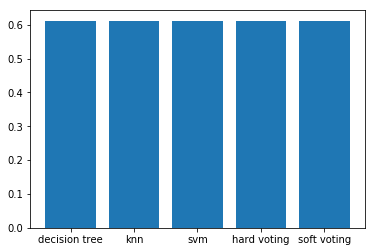

In [137]:
x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);